In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('/Users/damodargupta/Downloads/flight_price.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0]
df['Month'] = df['Date_of_Journey'].str.split('/').str[1]
df['Year'] = df['Date_of_Journey'].str.split('/').str[2]
df.drop('Date_of_Journey' , inplace=True , axis=1)


In [4]:
df['Year']=df['Year'].astype('int64')
df['Year'].dtype

dtype('int64')

In [5]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [6]:
df['Destination'] = df['Destination'].map({'New Delhi' :  1 , 'Banglore' : 2 , 'Cochin' : 3 , 'Kolkata' : 4 , 'Delhi' : 1 , 'Hyderabad': 5})

In [7]:
df[df['Destination'] == 5]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
59,Vistara,Mumbai,5,BOM → DEL → HYD,15:40,16:45 07 Mar,25h 5m,1 stop,No info,12395,6,03,2019
67,Air India,Mumbai,5,BOM → HYD,13:55,15:25,1h 30m,non-stop,No info,3625,6,05,2019
70,Jet Airways,Mumbai,5,BOM → HYD,07:05,08:30,1h 25m,non-stop,No info,5678,1,06,2019
77,IndiGo,Mumbai,5,BOM → HYD,06:25,07:55,1h 30m,non-stop,No info,4049,3,04,2019
98,Jet Airways,Mumbai,5,BOM → HYD,07:05,08:30,1h 25m,non-stop,No info,8040,18,06,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,Jet Airways,Mumbai,5,BOM → HYD,07:05,08:30,1h 25m,non-stop,In-flight meal not included,4050,18,05,2019
10617,IndiGo,Mumbai,5,BOM → HYD,02:35,04:05,1h 30m,non-stop,No info,2754,27,05,2019
10655,Jet Airways,Mumbai,5,BOM → HYD,02:55,04:20,1h 25m,non-stop,No info,5678,3,05,2019
10671,Air India,Mumbai,5,BOM → HYD,21:05,22:25,1h 20m,non-stop,No info,3100,6,06,2019


In [8]:
df[df['Destination'] == 4]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
12,Air India,Chennai,4,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667,24,06,2019
29,Vistara,Chennai,4,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687,15,06,2019
30,Vistara,Chennai,4,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,3687,18,06,2019
47,Air India,Chennai,4,MAA → CCU,11:40,13:55,2h 15m,non-stop,No info,4667,3,05,2019
57,Vistara,Chennai,4,MAA → CCU,07:05,09:20,2h 15m,non-stop,No info,7414,6,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10446,IndiGo,Chennai,4,MAA → CCU,11:35,14:00,2h 25m,non-stop,No info,3858,9,06,2019
10469,SpiceJet,Chennai,4,MAA → CCU,09:45,12:00,2h 15m,non-stop,No info,3597,27,05,2019
10489,IndiGo,Chennai,4,MAA → CCU,22:05,00:30 13 Mar,2h 25m,non-stop,No info,6297,15,03,2019
10610,IndiGo,Chennai,4,MAA → CCU,13:15,15:35,2h 20m,non-stop,No info,3597,21,05,2019


In [9]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [10]:
df['Total_Stops']= df['Total_Stops'].map({'non-stop': 0 , '1 stop': 1 , '2 stops' : 2 , '3 stops' : 3, np.nan:1 })

In [11]:
df['Total_Stops'].mode()

0    1.0
Name: Total_Stops, dtype: float64

In [12]:
df['Total_Stops'] = df['Total_Stops'].fillna(1.0)

In [13]:
df['dur_hours'] = df['Duration'].str.split(' ').str[0]
df['dur_minutes'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [14]:
df['Total_Stops'].unique()

array([0., 2., 1., 3.])

In [15]:
df['dur_minutes'] = df['dur_minutes'].fillna(0)
df['dur_minutes'] = df['dur_minutes'].astype('int64')

In [16]:
df['dur_minutes'] = df[['dur_minutes']]/60

In [17]:
df['dur_hours'] = df['dur_hours'].str.split('h').str[0]
df['dur_hours'] = df['dur_hours'].str.split('m').str[0]

In [18]:
df['dur_hours'] = df['dur_hours'].astype('int64')

In [19]:
df['dur_hours'] = df['dur_hours'] + df['dur_minutes']

In [20]:
df['dur_hours'] = df[['dur_hours']].round(2)

In [21]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,dur_hours,dur_minutes
0,IndiGo,Banglore,1,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0.0,No info,3897,24,03,2019,2.83,0.833333
1,Air India,Kolkata,2,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2.0,No info,7662,1,05,2019,7.42,0.416667
2,Jet Airways,Delhi,3,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2.0,No info,13882,9,06,2019,19.00,0.000000
3,IndiGo,Kolkata,2,CCU → NAG → BLR,18:05,23:30,5h 25m,1.0,No info,6218,12,05,2019,5.42,0.416667
4,IndiGo,Banglore,1,BLR → NAG → DEL,16:50,21:35,4h 45m,1.0,No info,13302,01,03,2019,4.75,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,2,CCU → BLR,19:55,22:25,2h 30m,0.0,No info,4107,9,04,2019,2.50,0.500000
10679,Air India,Kolkata,2,CCU → BLR,20:45,23:20,2h 35m,0.0,No info,4145,27,04,2019,2.58,0.583333
10680,Jet Airways,Banglore,1,BLR → DEL,08:20,11:20,3h,0.0,No info,7229,27,04,2019,3.00,0.000000
10681,Vistara,Banglore,1,BLR → DEL,11:30,14:10,2h 40m,0.0,No info,12648,01,03,2019,2.67,0.666667


# question 1

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10683 non-null  object 
 1   Source           10683 non-null  object 
 2   Destination      10683 non-null  int64  
 3   Route            10682 non-null  object 
 4   Dep_Time         10683 non-null  object 
 5   Arrival_Time     10683 non-null  object 
 6   Duration         10683 non-null  object 
 7   Total_Stops      10683 non-null  float64
 8   Additional_Info  10683 non-null  object 
 9   Price            10683 non-null  int64  
 10  Date             10683 non-null  object 
 11  Month            10683 non-null  object 
 12  Year             10683 non-null  int64  
 13  dur_hours        10683 non-null  float64
 14  dur_minutes      10683 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 1.2+ MB


The dataset contains 10683 rows and 11 columns

# question 2

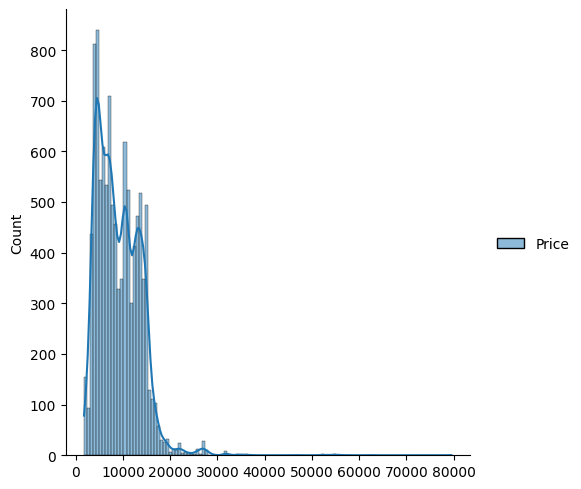

In [23]:
sns.displot(df[['Price']], kde=True)

# question 3

In [24]:
df[['Price']].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


so the minimum price is 1759.0 and the maximum price is 79512.0

# question 4

<Axes: xlabel='Airline', ylabel='Price'>

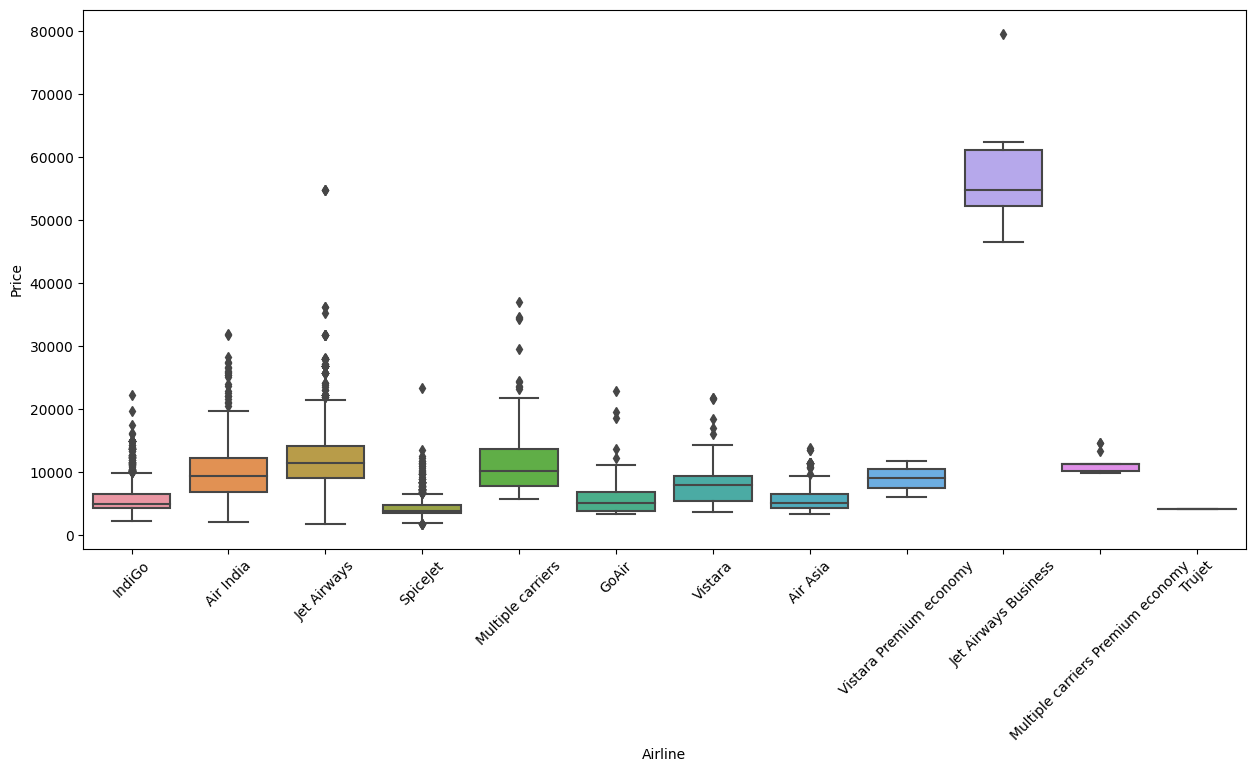

In [25]:
plt.subplots(1,1, figsize = (15,7))
plt.subplot(111)
plt.xticks(rotation=45)
sns.boxplot(x = 'Airline' ,  y = 'Price' , data=df )

# question 5

Yes, there are outliers in the dataset. This may lead to incorrect predictions by the model and lower its performance.
Outliers can influence measures of central tendency (mean, median) and dispersion (standard deviation) and can affect statistical analyses and machine learning models. They can skew results, create misleading patterns, and impact the accuracy of conclusions drawn from the data.


# question 6

We can use Month and Destination as columns to illustrate the most visited place during a season. Also we can use price as a factor because during peak travel seasons, the price of flights is higher

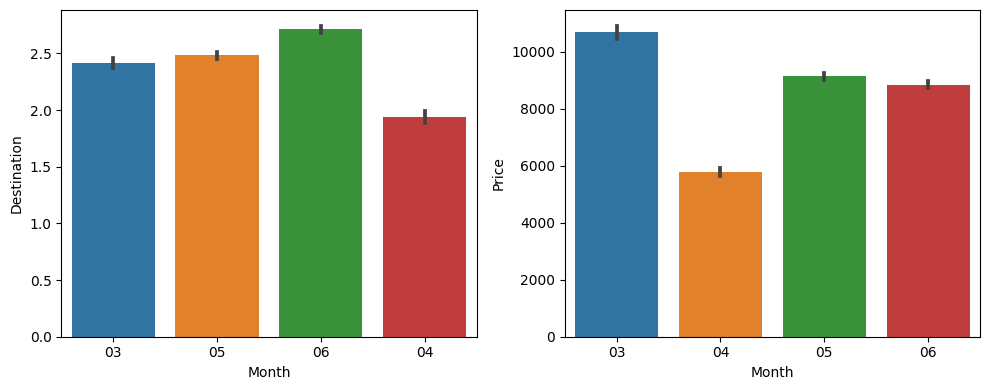

In [26]:
plt.subplots(121, figsize = (10,4))
plt.subplot(121)
sns.barplot(data=df , x='Month' , y='Destination' )
plt.subplot(122)
sns.barplot(data = df , x='Month' , y = 'Price' , order = ['03' , '04' , '05' , '06'])
plt.tight_layout()

# question 7

The price of the flights may fluctuate according to the travel time or peak time. Also the price flight might get affected by the number of stops it is taking. Also the destination and duration may affect the flight charges. Also it depends on airline like in question 4

In question 6, we saw that the march month was the peak time for travel after exams of children or in summer vacations. so the price of the flight was highest.

In [27]:
# stops vs price
# destination vs price
# duration vs price

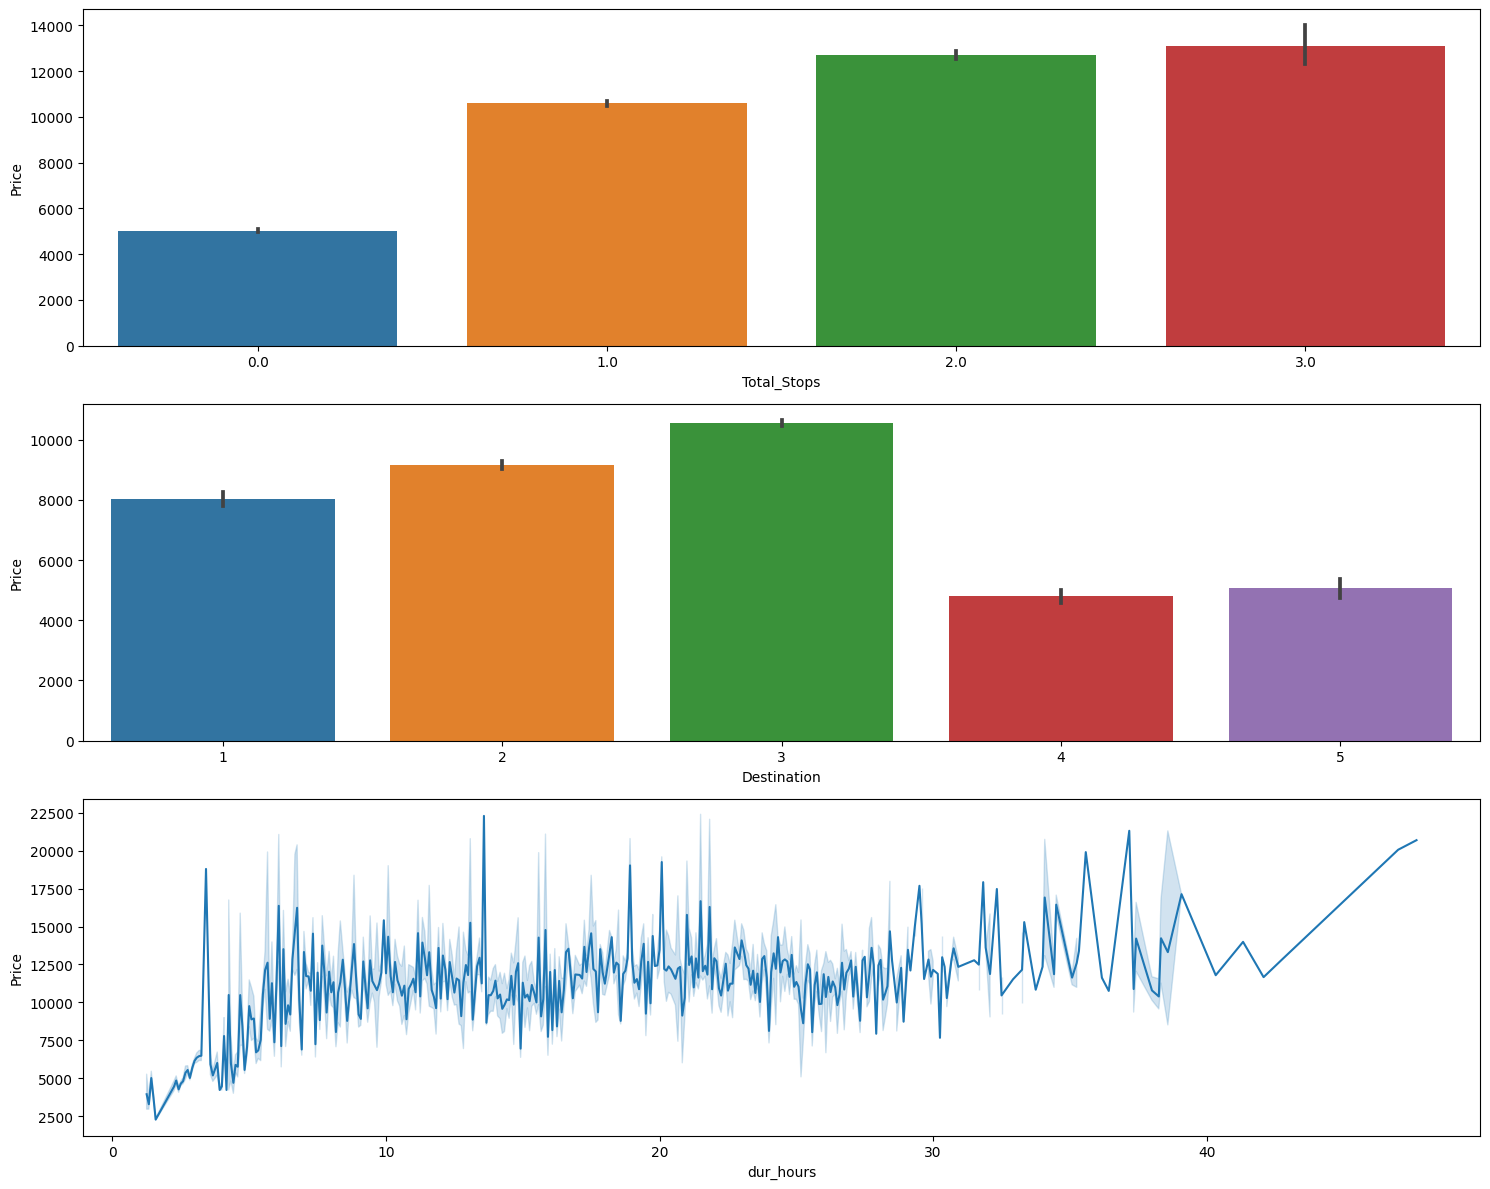

In [28]:
plt.subplots(3, 1 , figsize = (15,12))
plt.subplot(311)
sns.barplot(data = df , x = 'Total_Stops' , y = 'Price' )
plt.subplot(312)
sns.barplot(data = df , x = 'Destination' , y = 'Price' )
plt.subplot(313)
sns.lineplot(data = df , x = 'dur_hours' , y = 'Price')
plt.tight_layout()

Through these plots we can infer that-
1. the more the number of stops, the more is the price of the flight
2. The price of flight going to cochin is the highest.
3. the more the duration of the flight, the more is its price.

# question 8 

same as question 7

# question 9

In [313]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


The dataset has 10841 rows and 13 columns

# question 10

In [314]:
df['Rating'].isnull().sum()

1474

In [315]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [316]:
df.drop(df['Category'].index[10472] , inplace =True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [317]:
category = df['Category'].unique()
category

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [318]:
for i in category:
    print(df[df['Category']== i ]['Rating'].isnull().value_counts())

Rating
False    62
True      3
Name: count, dtype: int64
Rating
False    73
True     12
Name: count, dtype: int64
Rating
False    42
True     11
Name: count, dtype: int64
Rating
False    178
True      53
Name: count, dtype: int64
Rating
False    303
True     157
Name: count, dtype: int64
Rating
False    58
True      2
Name: count, dtype: int64
Rating
False    328
True      59
Name: count, dtype: int64
Rating
False    195
True      39
Name: count, dtype: int64
Rating
False    155
True       1
Name: count, dtype: int64
Rating
False    149
Name: count, dtype: int64
Rating
False    45
True     19
Name: count, dtype: int64
Rating
False    323
True      43
Name: count, dtype: int64
Rating
False    109
True      18
Name: count, dtype: int64
Rating
False    297
True      44
Name: count, dtype: int64
Rating
False    76
True     12
Name: count, dtype: int64
Rating
False    65
True     20
Name: count, dtype: int64
Rating
False    314
True      68
Name: count, dtype: int64
Rating
False    1097
Tru

In [319]:
for i in category:
    print(df[df['Category']==i]['Rating'].mode()[0])

4.7
4.6
4.7
4.5
4.4
4.4
4.3
4.1
4.6
4.2
4.6
4.3
4.5
4.6
4.5
4.1
5.0
4.5
4.3
4.5
4.3
4.5
4.3
4.4
4.4
4.2
4.5
4.4
4.4
4.2
4.3
4.3
4.2


In [320]:
for i in category:   
    filtered_df = df[df['Category']== i]
    filtered_df['Rating'].fillna(df[df['Category']== i ]['Rating'].mode()[0] , inplace=True)
    df.update(filtered_df)

In [321]:
df['Rating'].isnull().sum()

0

In [322]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.5,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


<Axes: xlabel='Category', ylabel='Rating'>

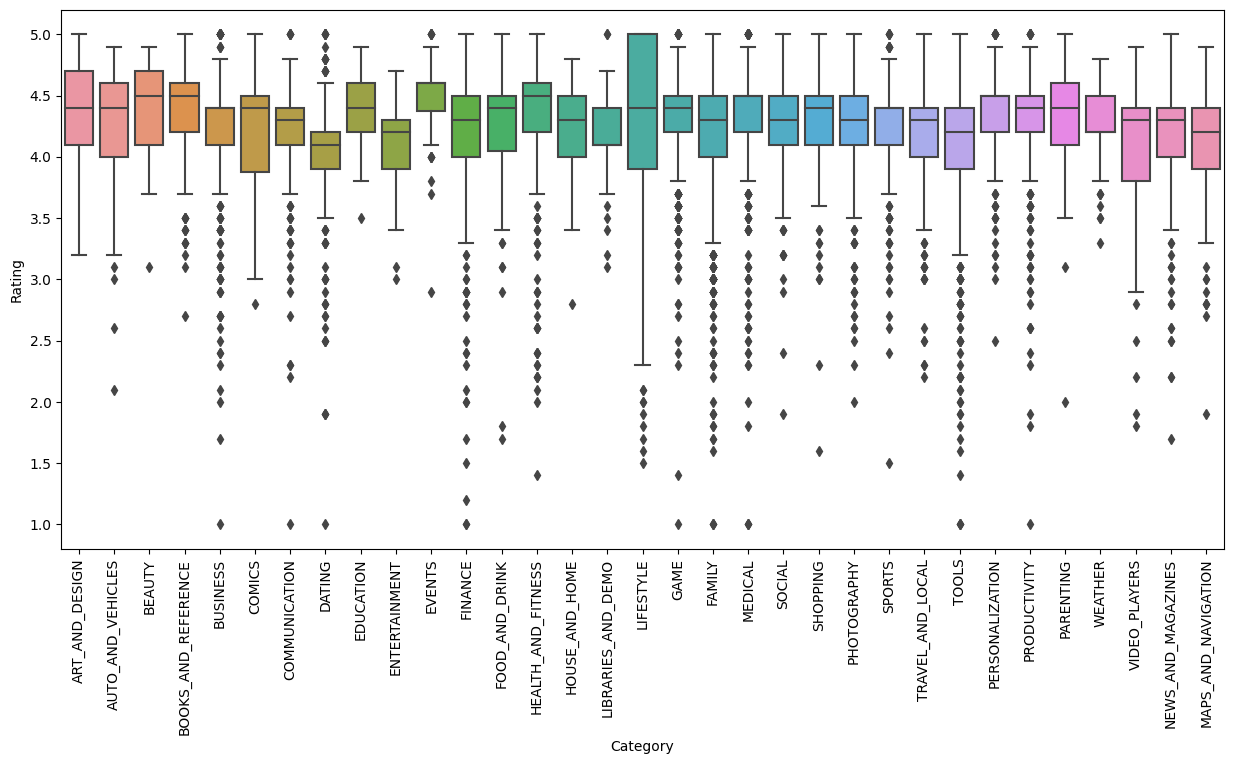

In [323]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.boxplot(data=df , x = 'Category' , y = 'Rating')

# question 11

In [324]:
for i in df.columns:
    print(df[i].isnull().value_counts())

App
False    10840
Name: count, dtype: int64
Category
False    10840
Name: count, dtype: int64
Rating
False    10840
Name: count, dtype: int64
Reviews
False    10840
Name: count, dtype: int64
Size
False    10840
Name: count, dtype: int64
Installs
False    10840
Name: count, dtype: int64
Type
False    10839
True         1
Name: count, dtype: int64
Price
False    10840
Name: count, dtype: int64
Content Rating
False    10840
Name: count, dtype: int64
Genres
False    10840
Name: count, dtype: int64
Last Updated
False    10840
Name: count, dtype: int64
Current Ver
False    10832
True         8
Name: count, dtype: int64
Android Ver
False    10838
True         2
Name: count, dtype: int64


After preprocessing the dataset in question 10, only Current version, Android Version and Type contain missing columns but they are very low in number. so it wont affect the model. But in clase of higher number of missing values , it may lead to biased and inaccurate predictions by the model.

# question 12

In [325]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [326]:
for idx, size in enumerate(df['Size']):
    list_out = [int(char) if char.isdigit() else char for char in size]
    if list_out[-1] == 'M':
        df['Size'][idx] = float(size.split('M')[0]) * 1000
    elif list_out[-1] == 'k':
        df['Size'][idx] = float(size.split('k')[0])
    else:
        df['Size'][idx] = np.nan

In [327]:
df['Size'][10840] = df['Size'][idx] = float(size.split('M')[0]) * 1000

In [328]:
df['Size']

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836     3600.0
10837     9500.0
10838        NaN
10839    19000.0
10840    19000.0
Name: Size, Length: 10840, dtype: object

In [329]:
df['Size'].astype(float)

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10836     3600.0
10837     9500.0
10838        NaN
10839    19000.0
10840    19000.0
Name: Size, Length: 10840, dtype: float64

In [330]:
df['Rating'].isnull().sum()

0

<Axes: xlabel='Rating', ylabel='Size'>

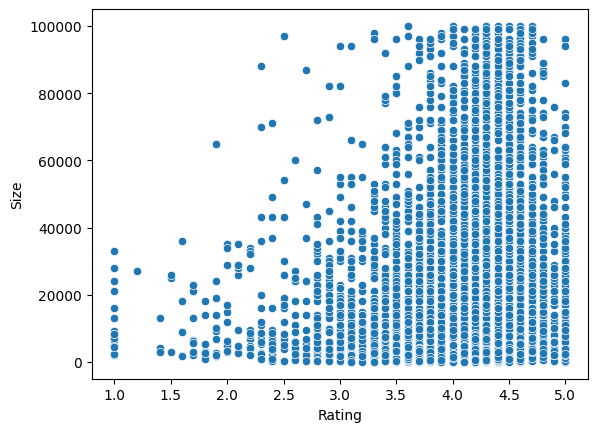

In [331]:
sns.scatterplot(y = 'Size' , x = 'Rating' , data=df)

# question 13

In [332]:
df[df['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [333]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [334]:
df['Type'] = df['Type'].map({'Free' : 0 , 'Paid' : 1})

In [335]:
df.drop(df.index[9148] , inplace=True)

In [336]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [337]:
df['Price'] = df['Price'].str.replace('$' , '')

In [338]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [339]:
df['Price'] = df['Price'].astype('float')
df['Type'] = df['Type'].astype('int')

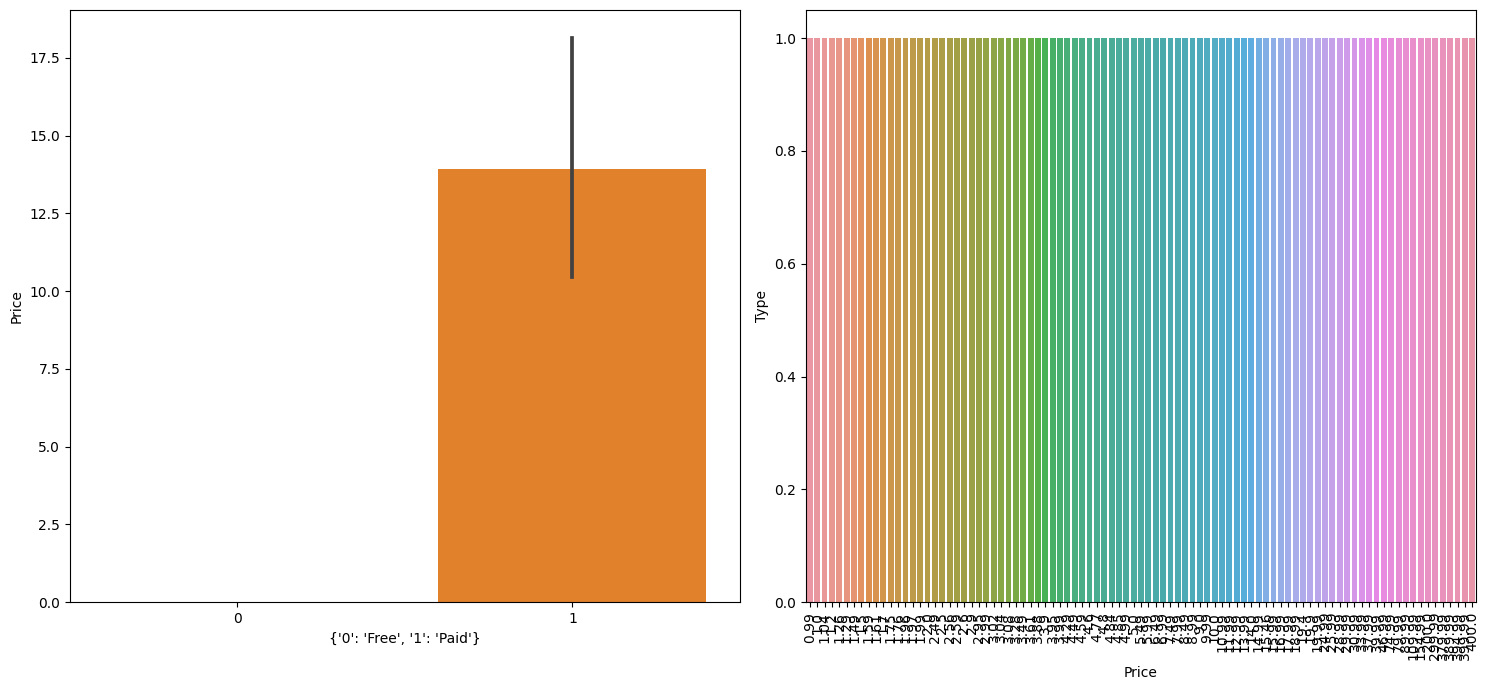

In [340]:
plt.subplots(1,2 , figsize=(15,7))
plt.subplot(121)
sns.barplot(y= 'Price' , x ='Type' , data=df)
plt.xlabel({'0' : 'Free' , '1' : 'Paid'})
plt.subplot(122)
sns.barplot(x = 'Price' , y = 'Type' , data = df[df['Price'] != 0])
plt.xticks(rotation = 90)
plt.tight_layout()

All the apps whose type is Free are priced 0 whereas all the apps whose type is Paid are priced. This can be seen in the second plot.

# question 14

In [341]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [342]:
to_remove = [',','+']
for symbol in to_remove:
    df['Installs'] = df['Installs'].str.replace(symbol , '')

In [343]:
df['Installs']=df['Installs'].astype(int)

In [344]:
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10839, dtype: int64

In [345]:
install_df = pd.DataFrame(df['Installs'].astype(int).nlargest(25))
install_df

,Installs
152,1000000000
335,1000000000
336,1000000000
338,1000000000
340,1000000000
341,1000000000
381,1000000000
382,1000000000
386,1000000000
391,1000000000


In [346]:
df['App']=df['App'].drop_duplicates(keep='first')

In [347]:
# create an empty dictionary to store the data
data = {}

# use nlargest() method to extract top 10 rows based on 'Installs' column
install_df = df.nlargest(25, 'Installs')

# iterate through the rows of the dataframe and append the 'App' column value to the dictionary
for index, row in install_df.iterrows():
    if index not in data:
        data[index] = []
    data[index].append(row['App'])

# create a pandas series with the app names for each index
apps_series = pd.Series(data)

# create a dataframe with two columns containing the index and the corresponding app name
app_df = pd.DataFrame({'App Name': apps_series.values}, index=apps_series.index)

print(app_df)

                                        App Name
152                          [Google Play Books]
335   [Messenger – Text and Video Chat for Free]
336                         [WhatsApp Messenger]
338               [Google Chrome: Fast & Secure]
340                                      [Gmail]
341                                   [Hangouts]
381                                        [nan]
382                                        [nan]
386                                        [nan]
391              [Skype - free IM & video calls]
411                                        [nan]
451                                        [nan]
464                                        [nan]
468                                        [nan]
865                          [Google Play Games]
1654                            [Subway Surfers]
1700                                       [nan]
1750                                       [nan]
1872                                       [nan]
1917                

In [348]:
final_df = pd.concat([install_df , app_df])

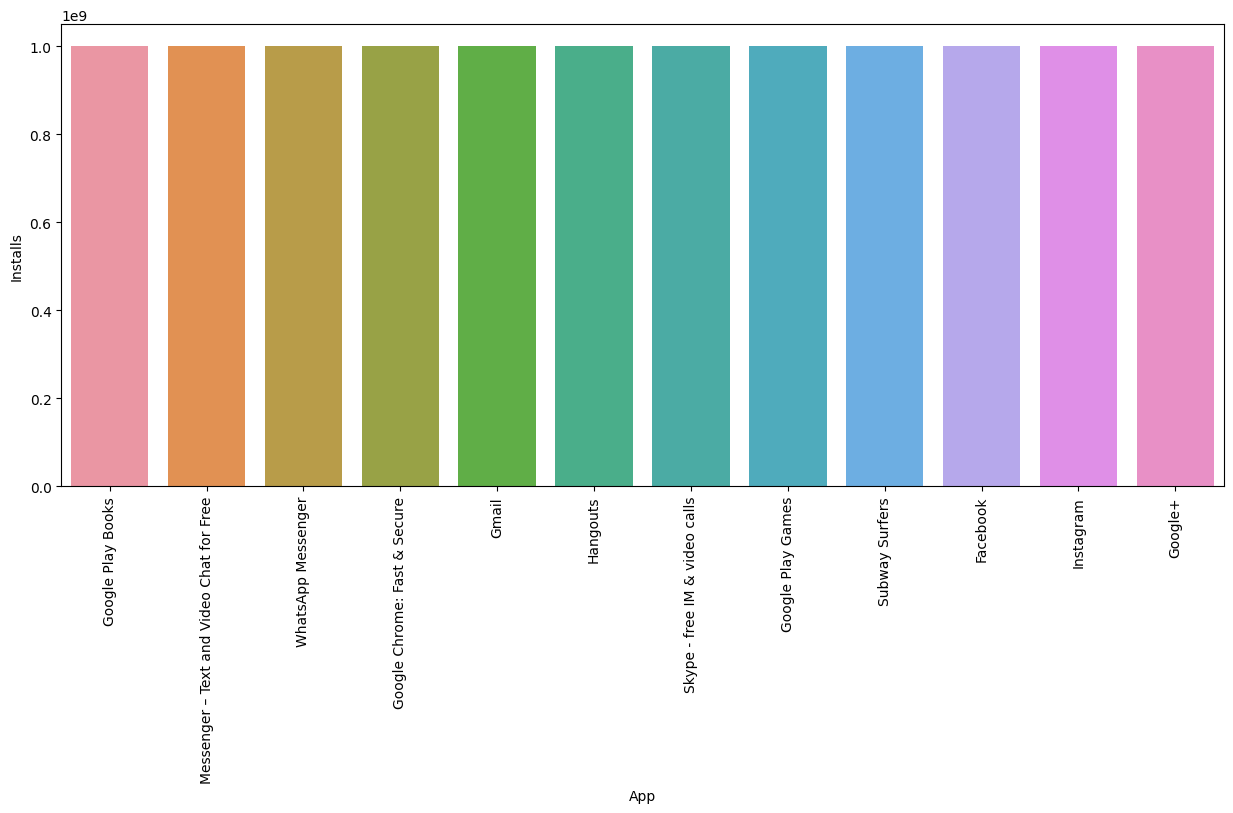

In [349]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'App', y = 'Installs', data=final_df)
plt.xticks(rotation=90)
plt.show()

so the top 10 apps with the highest number of installs i.e 1000000000 are Google Play Books, Messenger – Text and Video Chat for Free, WhatsApp Messenger, Google Chrome: Fast & Secure,Gmail,Hangouts ,  Skype - free IM & video calls ,  Google Play Games, Subway Surfers, Facebook 

# question 15

<Axes: ylabel='count'>

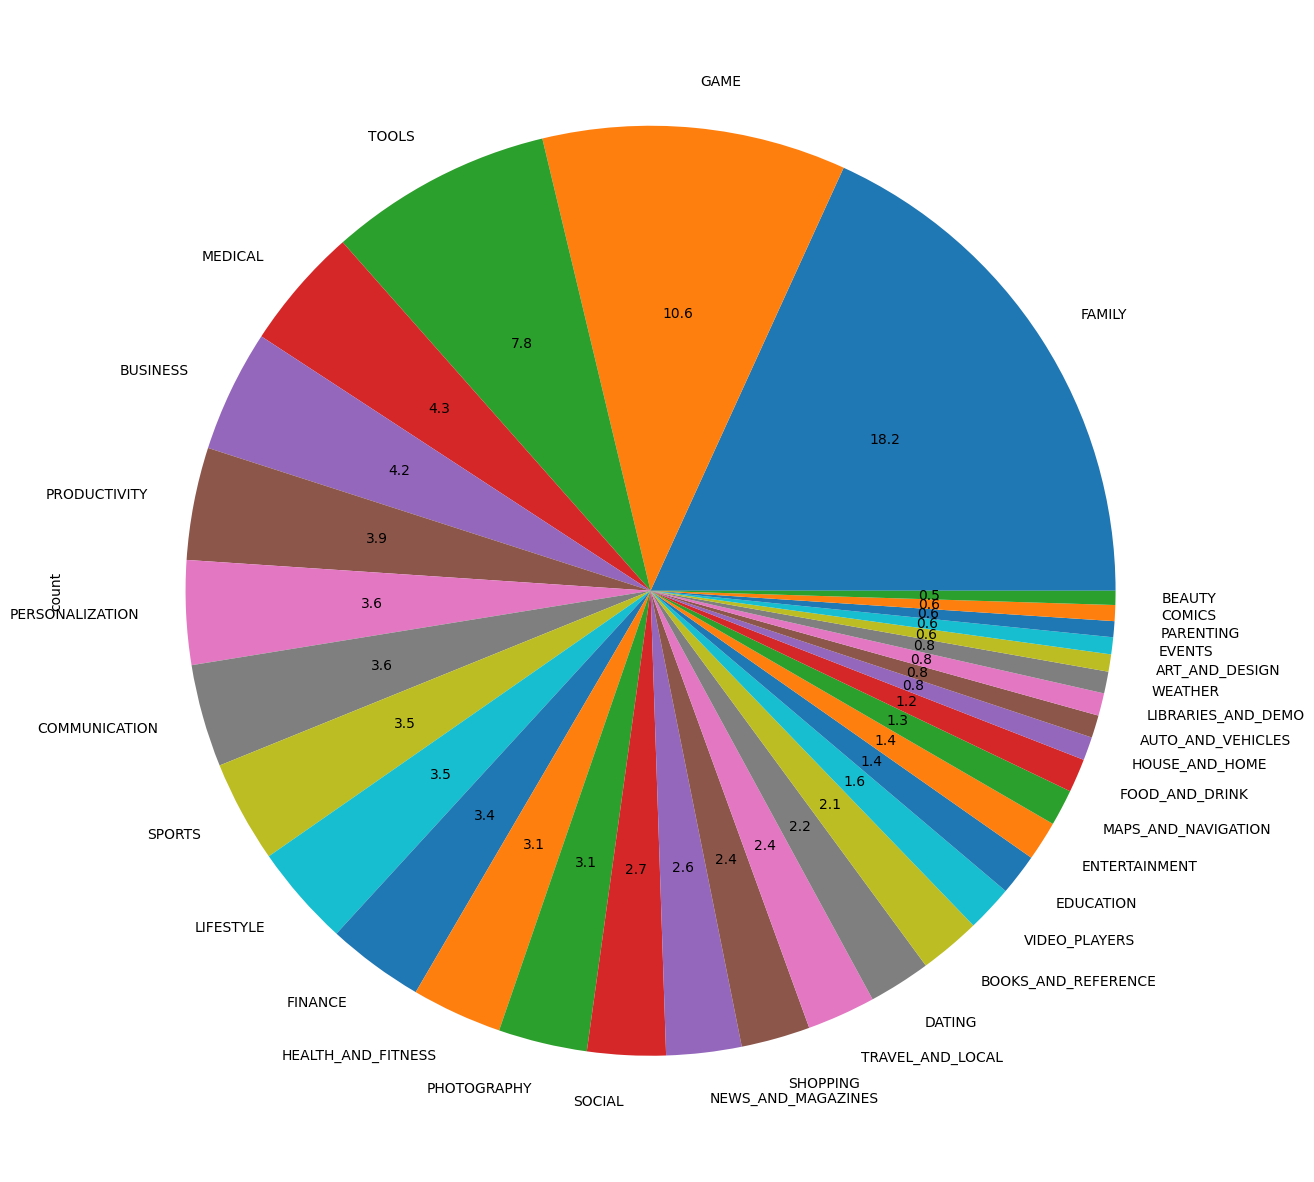

In [350]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct='%1.1f')

The most popular app categories include Family, Games and Tools

<Axes: xlabel='Type', ylabel='Installs'>

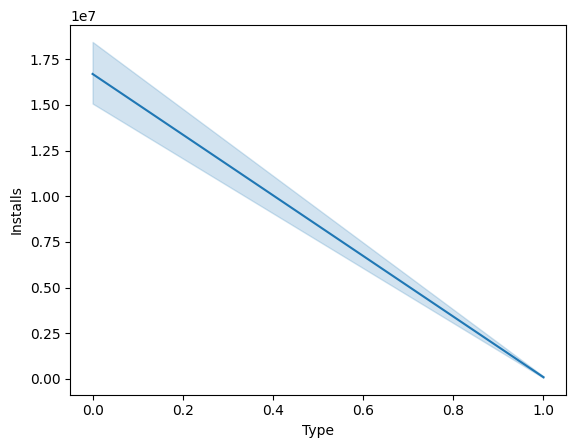

In [351]:
sns.lineplot(y = 'Installs' , x = 'Type' , data=df)

I would suggest the company to make the launch in one of the most popular categories and also suggest to make the app free. As shown in the graph, the free type app get more number of installs than paid type. Thus, the app will be successful

# question 16

In [422]:
# most successful app devs
# features to be analysed are number of installs vs version and Ratings vs Version

In [412]:
for index , row in df.iterrows():
    df['Android Ver'][index] = str(df['Android Ver'][index]).split(' ')[0]
    

In [413]:
df['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1',
       '4.3', '2.0', '3.2', '4.4W', '7.1', '8.0', '3.1', '2.0.1', 'nan',
       '1.0'], dtype=object)

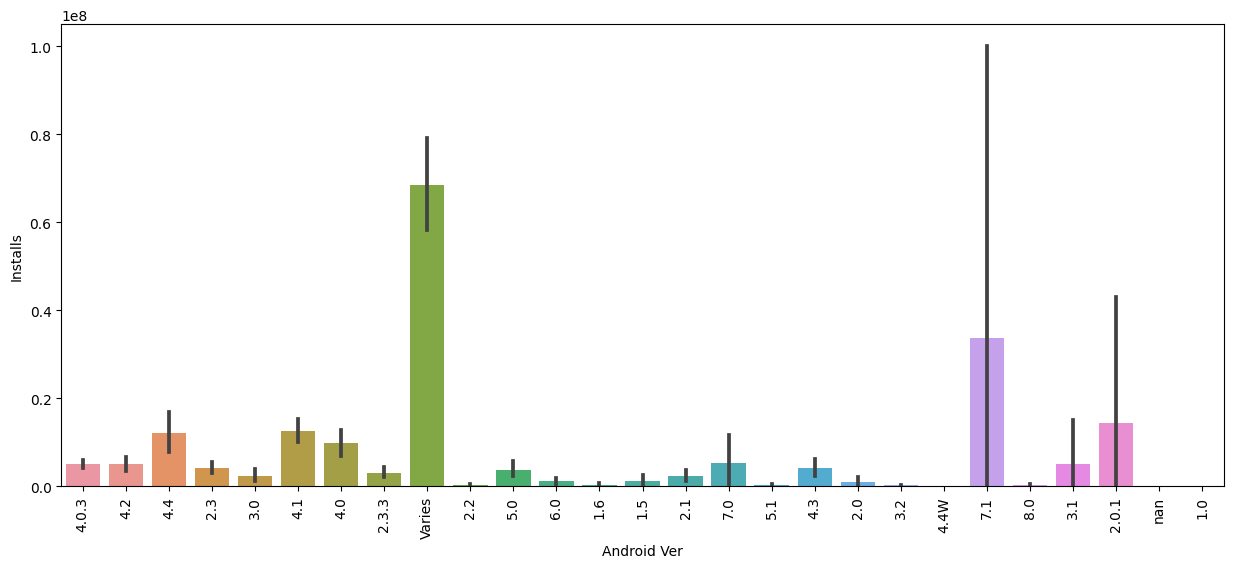

In [415]:
plt.subplots(2,1,figsize=(15,6))
plt.subplot(111)
sns.barplot(y = 'Installs' , x = 'Android Ver',  data = df )
plt.xticks(rotation=90)
plt.show()

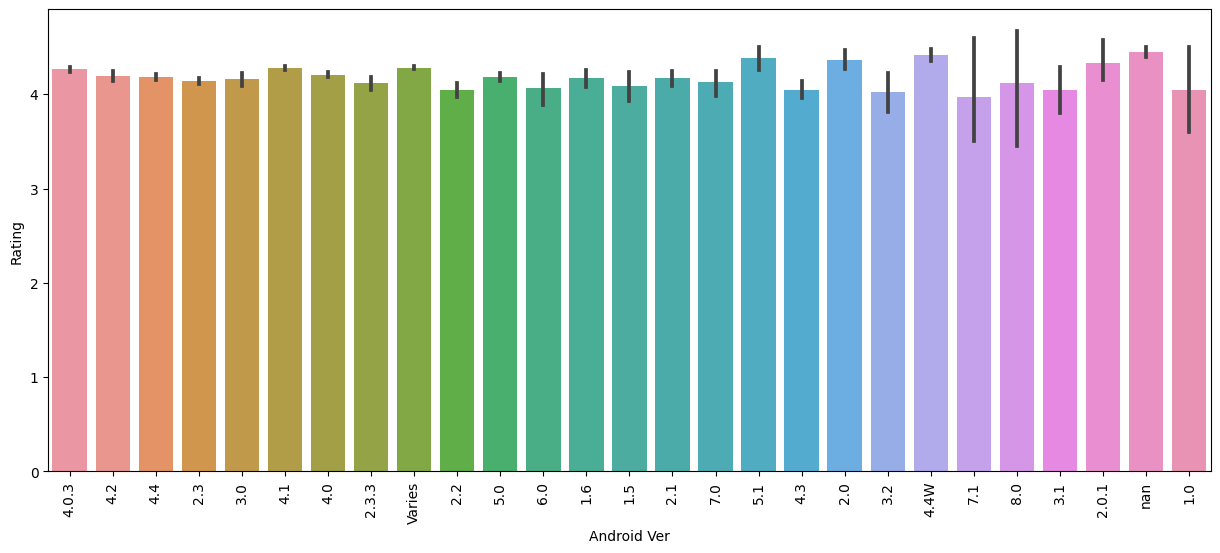

In [421]:
plt.subplots(2,1,figsize=(15,6))
plt.subplot(111)
sns.barplot(y = 'Rating' , x = 'Android Ver',  data = df )
plt.xticks(rotation=90)
plt.show()

the most successful app developers are those who have developed apps with the highest number of installations and rating. In my opinion and by looking at the visualizations, I inferred that the developers whose applications vary with device have highest number of installations and are successful developers. Also by the second graph, it can be noticed that varies with device almost has a rating of 5 among others. 

# question 17

In [423]:
# best time to launch an app

In [424]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,3600.0,5000,0,0.0,Everyone,Education,2017-07-25,1.48,4.1,25,7,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,9500.0,100,0,0.0,Everyone,Education,2018-07-06,1.0,4.1,6,7,2018
10838,Parkinson Exercices FR,MEDICAL,4.5,3,NaN,1000,0,0.0,Everyone,Medical,2017-01-20,1.0,2.2,20,1,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,19000.0,1000,0,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies,19,1,2015


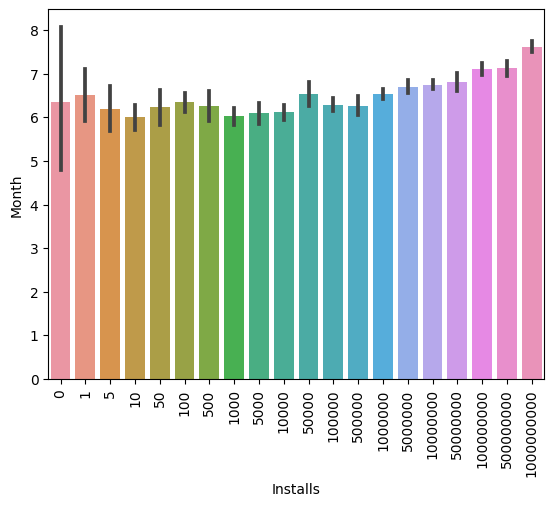

In [429]:
sns.barplot(x = 'Installs' , y = 'Month' , data=df)
plt.xticks(rotation=90)
plt.show()

Since the number of installations are highest in the month of July-August, that means the number of active users on Google playstore will also be high. Thus, I would recommend the company that this is the best time to lauch the application.